# Predict price of the car

In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)    # Display all columns 
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv("old_cars.csv") 

In [4]:
df.shape

(201, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          201 non-null    object 
 1   fuel-type     201 non-null    object 
 2   num-of-doors  201 non-null    object 
 3   body-style    201 non-null    object 
 4   drive-wheels  201 non-null    object 
 5   curb-weight   201 non-null    int64  
 6   engine-size   201 non-null    int64  
 7   highway-mpg   201 non-null    int64  
 8   wheel-base    201 non-null    float64
 9   price         201 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 15.8+ KB


In [6]:
df.sample(10)

make fuel-type num-of-doors body-style drive-wheels  curb-weight  \
154   toyota    diesel         four      sedan          fwd         2275   
128     saab       gas          two  hatchback          fwd         2658   
190    volvo       gas         four      sedan          rwd         2912   
124  porsche       gas          two    hardtop          rwd         2756   
132     saab       gas          two  hatchback          fwd         2808   
86    nissan       gas          two      sedan          fwd         1889   
12       bmw       gas         four      sedan          rwd         2765   
151   toyota       gas         four      wagon          4wd         3110   
135   subaru       gas          two  hatchback          fwd         2120   
112   peugot       gas         four      sedan          rwd         3075   

     engine-size  highway-mpg  wheel-base    price  
154          110           36        95.7   7898.0  
128          121           28        99.1  11850.0  
190          141           28       104.3  12940.0  
124          194           25        89.5  34028.0  
132          121           26        99.1  18150.0  
86            97           37        94.5   5499.0  
12           164           28       101.2  21105.0  
151           92           32        95.7   8778.0  
135          108           31        93.7   7053.0  
112          120           24       107.9  16630.0

In [8]:
cm = df.corr(numeric_only=True)
cm

curb-weight  engine-size  highway-mpg  wheel-base     price
curb-weight     1.000000     0.849072    -0.794889    0.782097  0.834415
engine-size     0.849072     1.000000    -0.679571    0.572027  0.872335
highway-mpg    -0.794889    -0.679571     1.000000   -0.543304 -0.704692
wheel-base      0.782097     0.572027    -0.543304    1.000000  0.584642
price           0.834415     0.872335    -0.704692    0.584642  1.000000

In [9]:
np.abs(cm['price']).sort_values(ascending=False)

price          1.000000
engine-size    0.872335
curb-weight    0.834415
highway-mpg    0.704692
wheel-base     0.584642
Name: price, dtype: float64

In [10]:
df.describe()

curb-weight  engine-size  highway-mpg  wheel-base         price
count   201.000000   201.000000   201.000000  201.000000    201.000000
mean   2555.666667   126.875622    30.686567   98.797015  13207.129353
std     517.296727    41.546834     6.815150    6.066366   7947.066342
min    1488.000000    61.000000    16.000000   86.600000   5118.000000
25%    2169.000000    98.000000    25.000000   94.500000   7775.000000
50%    2414.000000   120.000000    30.000000   97.000000  10295.000000
75%    2926.000000   141.000000    34.000000  102.400000  16500.000000
max    4066.000000   326.000000    54.000000  120.900000  45400.000000

In [17]:
df.describe(include=['object'])  # Only columns of type object 

make fuel-type num-of-doors body-style drive-wheels
count      201       201          201        201          201
unique      22         2            3          5            3
top     toyota       gas         four      sedan          fwd
freq        32       181          113         94          118

## Univariate Analysis

### Price

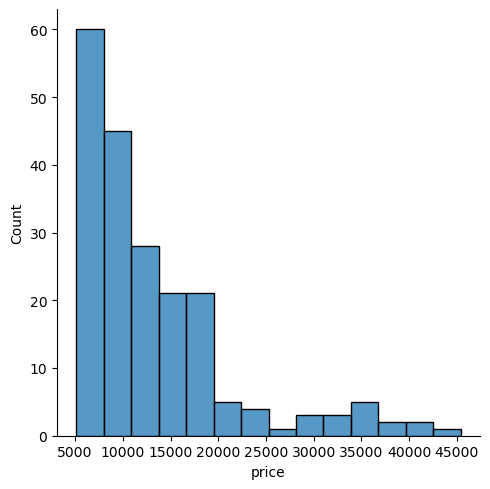

In [62]:
sns.displot(df['price'], kde=False)

<Axes: xlabel='price'>

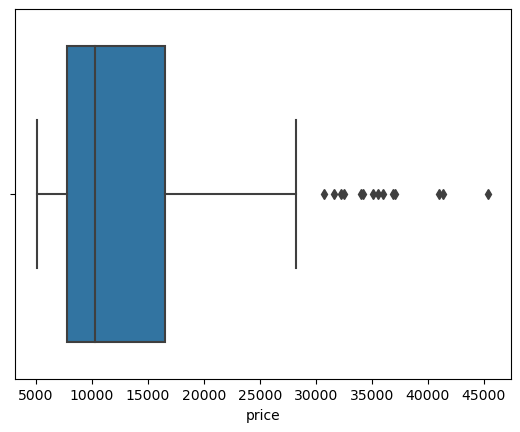

In [18]:
sns.boxplot(x = df['price'])

### fuel-type

In [19]:
df['fuel-type'].value_counts()

fuel-type
gas       181
diesel     20
Name: count, dtype: int64

<Axes: xlabel='fuel-type', ylabel='count'>

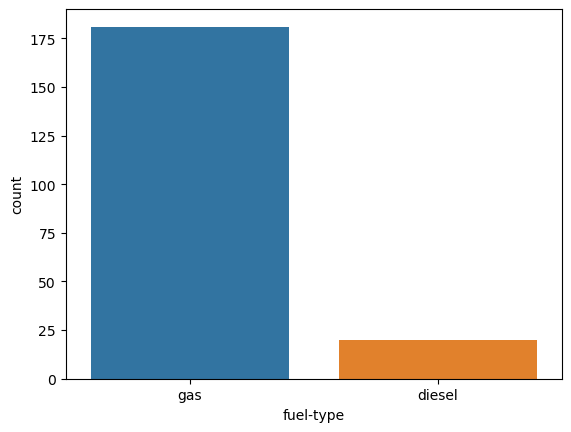

In [20]:
sns.countplot(x= df['fuel-type'])

In [21]:
df.groupby('fuel-type')['price'].median()

fuel-type
diesel    13852.5
gas        9989.0
Name: price, dtype: float64

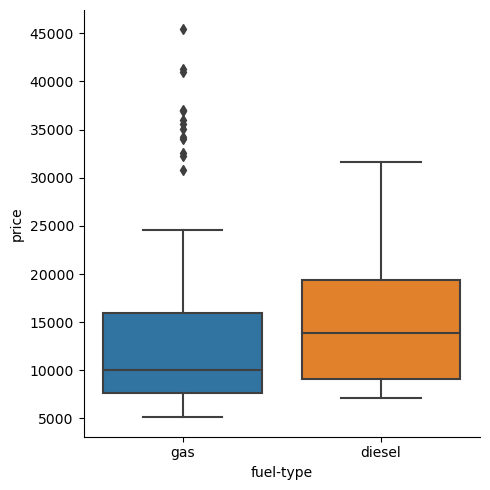

In [68]:
sns.catplot(x='fuel-type',y="price", data=df, kind='box')

### make

In [22]:
df['make'].unique().size

22

<Axes: xlabel='make', ylabel='price'>

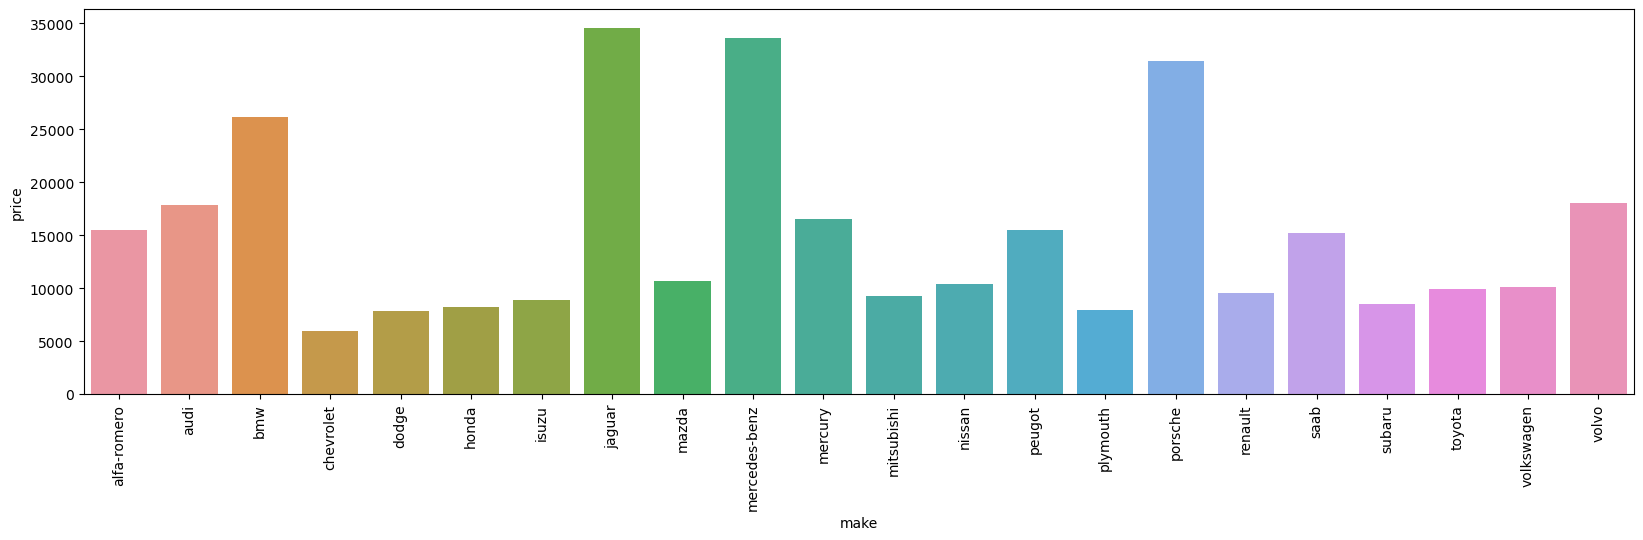

In [23]:
g = df.groupby('make', as_index = False)['price'].mean()
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x = g['make'], y = g['price'])

In [71]:
df.groupby('make')['price'].mean().sort_values(ascending=False)

make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64

<Axes: xlabel='make', ylabel='count'>

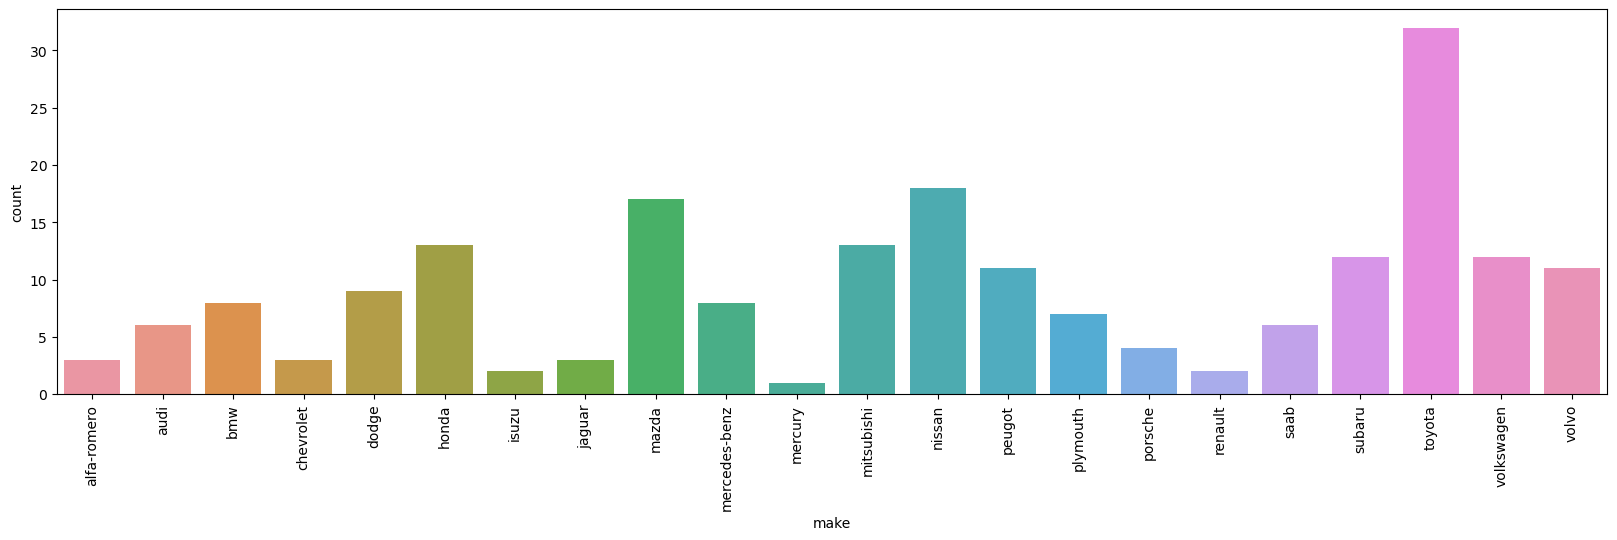

In [24]:
# Understand distribution of make
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.countplot(x= df['make'])

In [73]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

### Body-style

<Axes: xlabel='body-style', ylabel='count'>

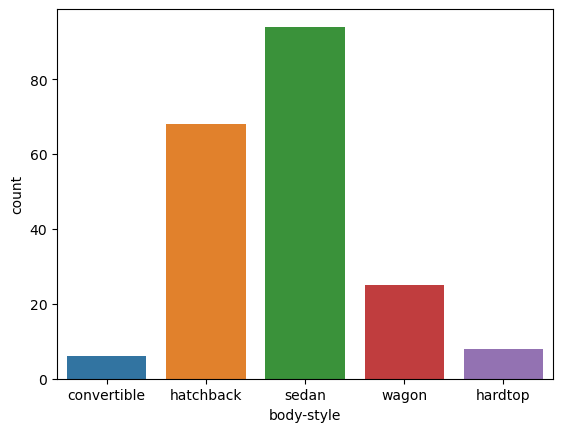

In [74]:
# Understand distribution of fuel-type
sns.countplot(x= df['body-style'])

<Axes: xlabel='body-style', ylabel='price'>

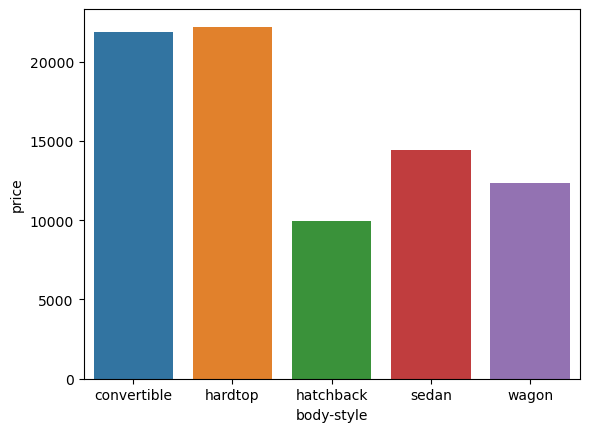

In [75]:
g = df.groupby('body-style', as_index = False)['price'].mean()
sns.barplot(x = g['body-style'], y = g['price'])

## num-of-doors

In [76]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
?         2
Name: count, dtype: int64

In [25]:
# Replace ? in no-of-doors with mode of no-of-doors
df.loc[df['num-of-doors'] == '?', 'num-of-doors'] = df['num-of-doors'].mode()[0]

<Axes: xlabel='num-of-doors', ylabel='count'>

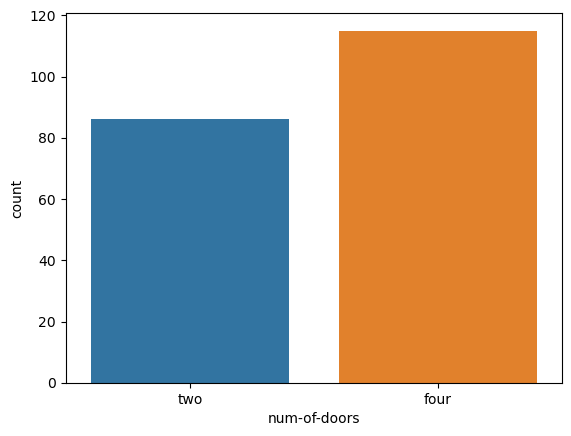

In [26]:
# Understand distribution of fuel-type
sns.countplot(x= df['num-of-doors'])

<Axes: xlabel='num-of-doors', ylabel='price'>

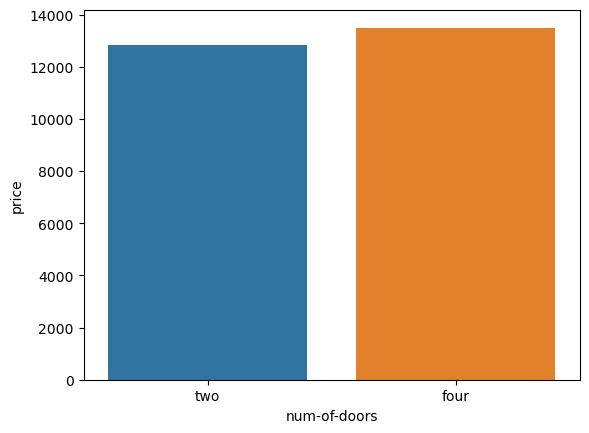

In [79]:
sns.barplot(x="num-of-doors", y="price", data = df, ci = False)

<Axes: xlabel='num-of-doors', ylabel='price'>

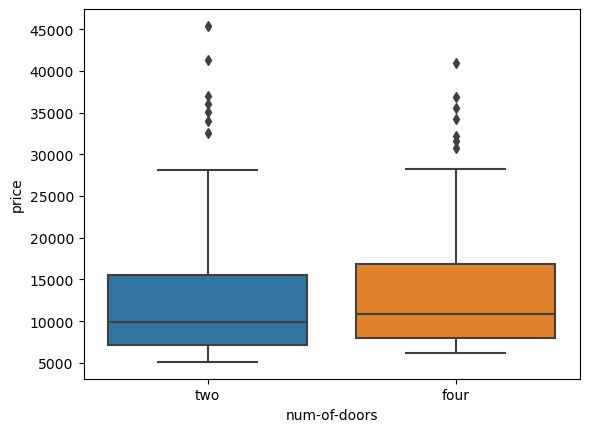

In [80]:
sns.boxplot(x="num-of-doors", y = "price", data = df)

### drive-wheel

<Axes: xlabel='drive-wheels', ylabel='price'>

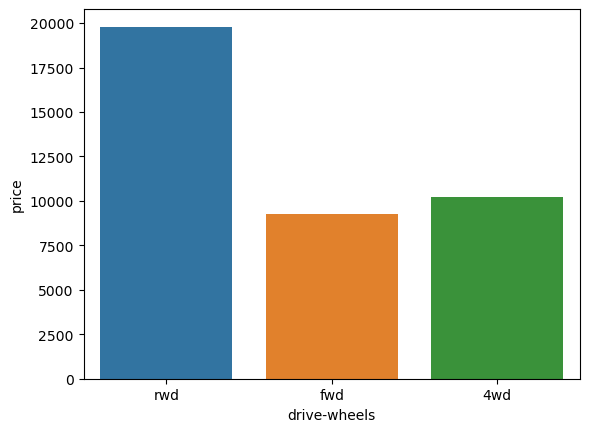

In [81]:
sns.barplot(x="drive-wheels", y='price', data=df, ci= False)

<Axes: xlabel='drive-wheels', ylabel='count'>

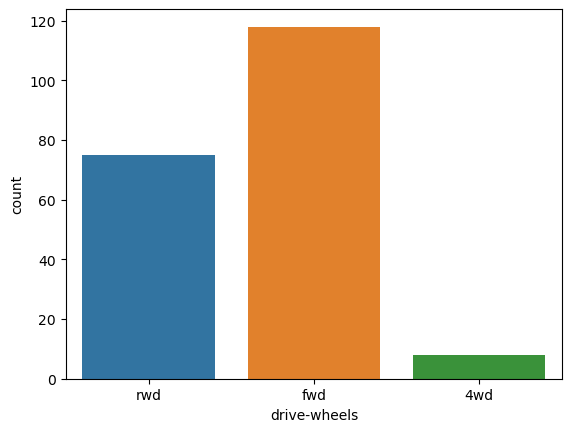

In [82]:
sns.countplot(x="drive-wheels", data=df)

### engine-size

<Axes: xlabel='engine-size'>

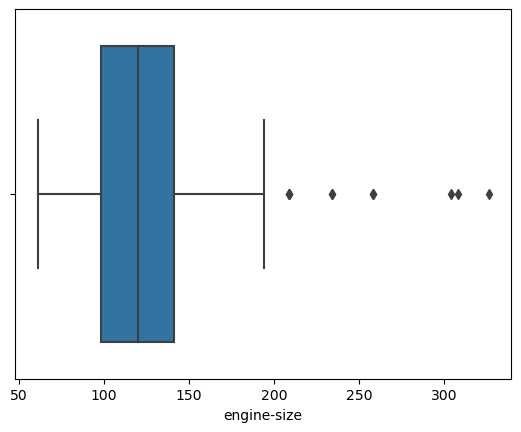

In [83]:
# Understand distribution of engine-size
sns.boxplot(x= df['engine-size'])

<Axes: xlabel='make', ylabel='engine-size'>

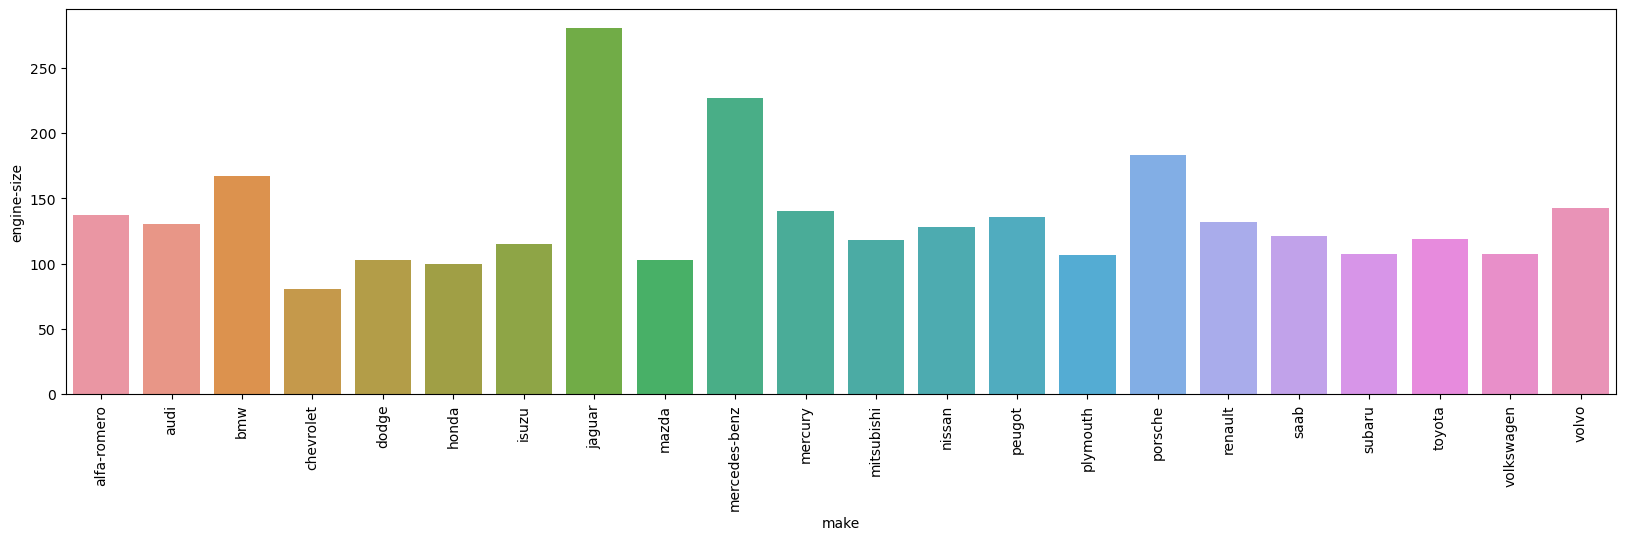

In [84]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x='make',y='engine-size', data=df, ci=False)

### highway-mpg

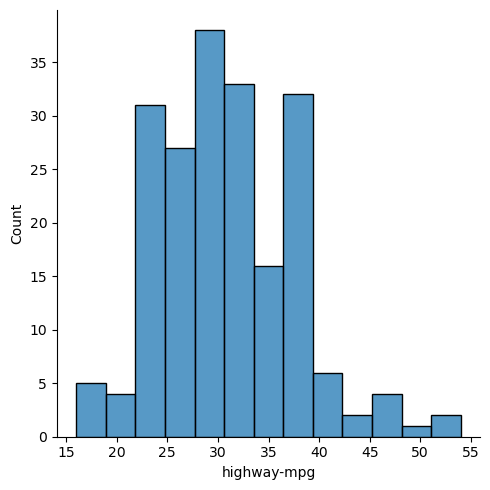

In [85]:
# Understand distribution of highway-mpg
sns.displot(x = df['highway-mpg'], kde=False)

<Axes: xlabel='make', ylabel='highway-mpg'>

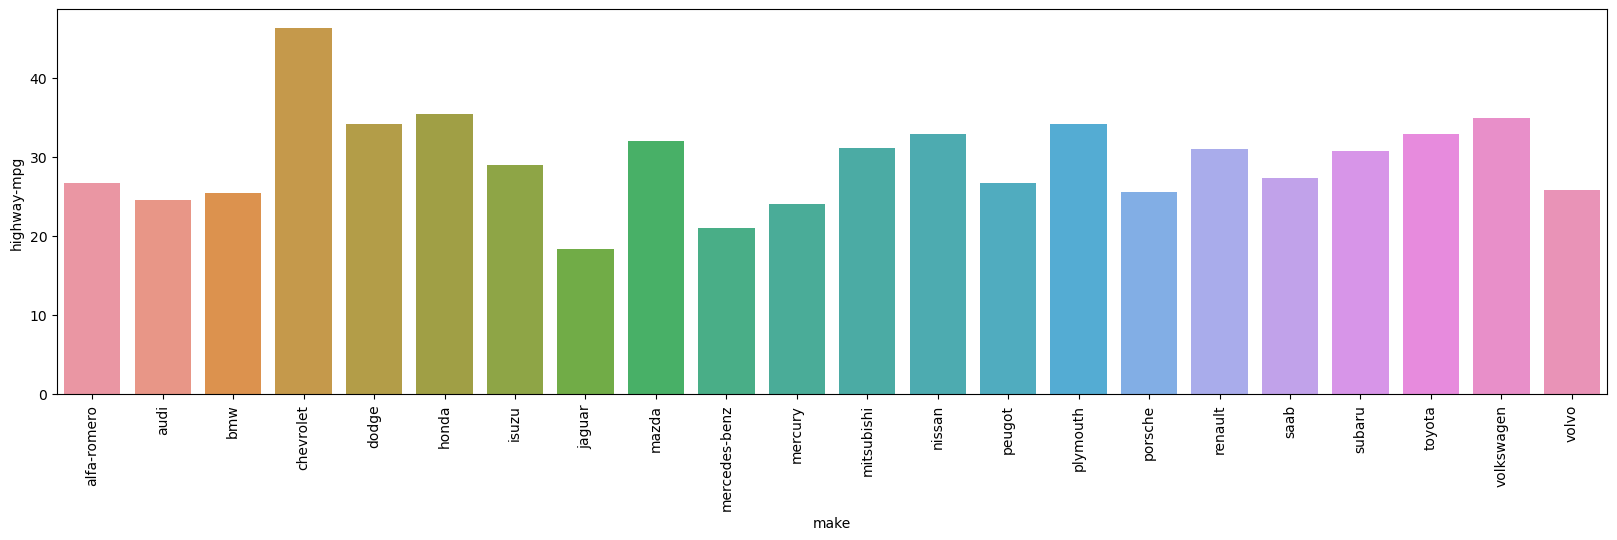

In [86]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x='make', y = 'highway-mpg', data = df, ci=False)

<Axes: >

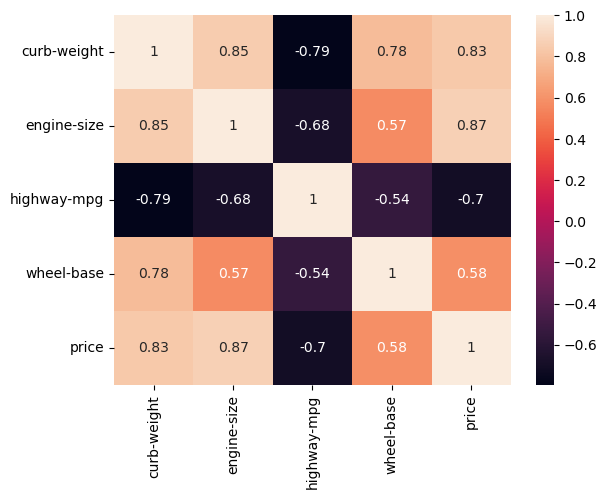

In [88]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

<Axes: xlabel='curb-weight', ylabel='highway-mpg'>

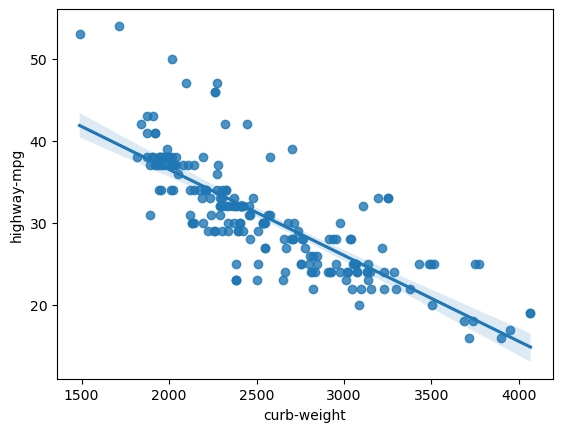

In [89]:
sns.regplot(x="curb-weight", y = "highway-mpg", data=df)

<Axes: xlabel='engine-size', ylabel='price'>

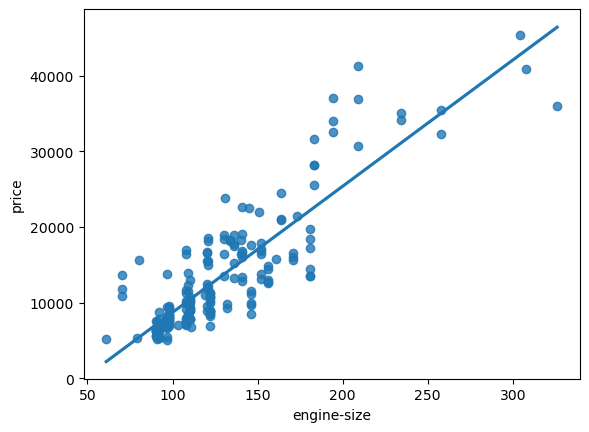

In [90]:
# Compare Engine size with price 
sns.regplot(x ="engine-size", y = 'price', data = df,ci=False)

<Axes: xlabel='highway-mpg', ylabel='price'>

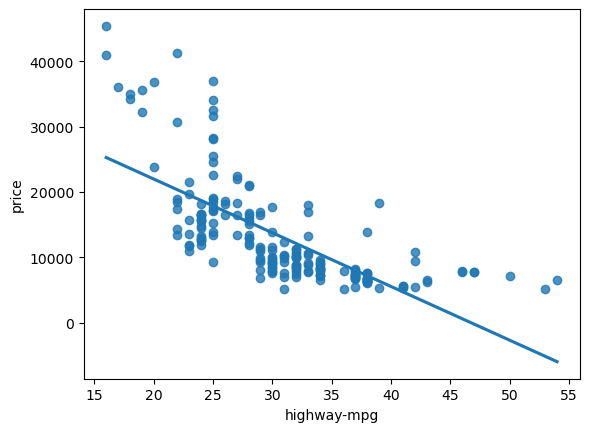

In [28]:
# Compare city-mpg with price 
sns.regplot(x ="highway-mpg", y = 'price', data = df, ci = False)

In [29]:
# Save dataframe
df.to_csv("final_cars.csv",index=False)